## Spaghetti Plots and Postage Stamps with Python ##
**Tyler Wixtrom**<br>
*Texas Tech University*<br>

Unidata Users Workshop<br>
*June 25-28, 2018<br>
Boulder, CO*

In this example, we will look at the simplest form of ensemble visualization, spaghetti plots, while using python loops and list comprehension to simplify creating these plots. To get started, we will need to download some data from the following location:
https://drive.google.com/open?id=1NVMoPlt8PbAzW91WT-M6wy3PD206eExR

In [1]:
import numpy as np
from datetime import datetime
from netCDF4 import Dataset, num2date

### Data ###

To get started, we will need to bring in some data. The included sample data is from a 20-member multi-physics ensemble initialized at 12 UTC on 1 February 2015. To start, lets look at what data is available.

In [2]:
data = data = Dataset('../2015020112/wrfprst_d01_2015020112_mem1.nc')
print(list(data.variables))

['pressure_levels', 'valid_time', 'lat', 'lon', 'height', 'tot_pcp', 'timestep_pcp', 'mslp', 'UH', 'cape', 'cin', 'DBZ']


In [3]:
print(data.variables['height'])
print(data.variables['pressure_levels'])
print(data.variables['pressure_levels'][:])

<class 'netCDF4._netCDF4.Variable'>
float32 height(time, pressure_levels, lat, lon)
    units: m
    decription: height [MSL] of isobaric surfaces
unlimited dimensions: time
current shape = (17, 1, 327, 507)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float32 pressure_levels(pressure_levels)
    units: Pascal
    description: Isobaric Pressure Levels
unlimited dimensions: 
current shape = (1,)
filling on, default _FillValue of 9.969209968386869e+36 used

[50000.0]


We can see that each file contains several variables, one of which is the geopotential height on the 500 hPa surface. For this example, we will need to open the 500 hPa height fields from each of the forecast members. This will be done with the aid of a loop and a dictionary.

In [4]:
heights = {}
for i in range(1, 21):
    data = Dataset('../2015020112/wrfprst_d01_2015020112_mem'+str(i)+'.nc')
    heights['mem'+str(i)] = data.variables['height'][:].data

Since the grid and time coordinates are the same for all members, we will open the latitude, longitude, and time arrays once and use them as the reference for all members

In [5]:
lat = data.variables['lat'][0, :]
lon = data.variables['lon'][0, :]
vtimes = num2date(data.variables['valid_time'][:], data.variables['valid_time'].units)

### Create the Plots ###
To create the spaghetti plots, we will use the cartopy package (https://scitools.org.uk/cartopy/docs/latest/) for geographic reference, and the Matplotlib package (https://matplotlib.org) for plotting.

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Set up our projection
plotcrs = ccrs.LambertConformal(central_longitude=-100.0, central_latitude=45.0)

# Get data to plot state and province boundaries
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lakes',
    scale='50m',
    facecolor='none')

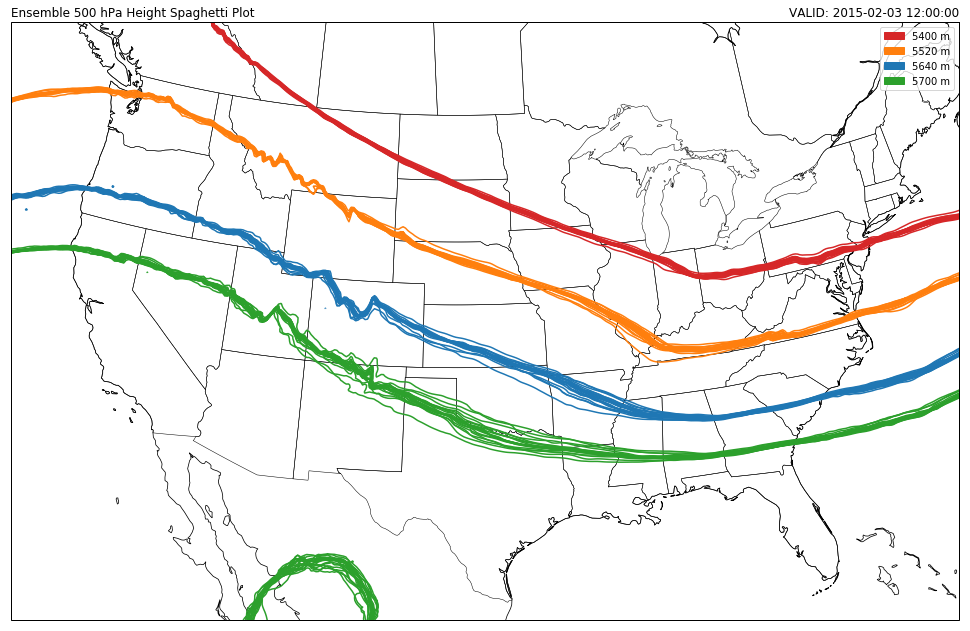

In [7]:
# Choose a time to plot
time = -1

# Set up the figure and add a map background
fig = plt.figure(1, figsize=(17., 12.))
ax = plt.subplot(111, projection=plotcrs)
ax.set_extent((-123, -74, 25, 51), ccrs.PlateCarree())
ax.coastlines('50m', edgecolor='black', linewidth=0.75)
ax.add_feature(states_provinces, edgecolor='black', linewidth=0.5)

# Plot the desired contours for each member
for i in range(1, 21):
    contours = np.array([5400, 5520, 5640, 5700])
    ax.contour(lon, lat, heights['mem'+str(i)][time, 0,], contours, colors=['tab:red', 'tab:orange', 'tab:blue',  'tab:green'],
               transform=ccrs.PlateCarree())

# Add each contour color to the legend
red_patch = mpatches.Patch(color='tab:red', label='5400 m')
orange_patch = mpatches.Patch(color='tab:orange', label='5520 m')
blue_patch = mpatches.Patch(color='tab:blue', label='5640 m')
green_patch = mpatches.Patch(color='tab:green', label='5700 m')
plt.legend(handles=[red_patch, orange_patch, blue_patch, green_patch], loc=1)

# Make some titles
plt.title('Ensemble 500 hPa Height Spaghetti Plot', loc='left')
plt.title('VALID: %s' % (vtimes[time]), loc='right')
plt.show()

### Your Turn! ###

Try making a spaghetti plot of the 992, 1000, and 1008 hPa contours of MSLP.

In [ ]:
mslp = {}
for i in range(1, 21):
    data = Dataset('../2015020112/wrfprst_d01_2015020112_mem'+str(i)+'.nc')
    mslp[] =         ######## Complete This Line #########

In [ ]:
# Choose a time to plot
time = 5

# Set up the figure and add a map background
fig = plt.figure(1, figsize=(17., 12.))
ax = plt.subplot(111, projection=plotcrs)
ax.set_extent((-123, -74, 25, 51), ccrs.PlateCarree())
ax.coastlines('50m', edgecolor='black', linewidth=0.75)
ax.add_feature(states_provinces, edgecolor='black', linewidth=0.5)

# Plot the desired contours for each member
for i in range(1, 21):
    
    # Choose the contours to plot
    contours = np.array([]) ######### Complete This Line #########

    # Fill in the blanks to plot the MSLP for each member
    ax.contour(lon, lat, mslp[][time,], ######## Complete This Line ##########
               contours, 
               colors=['tab:red', 'tab:orange', 'tab:green'],
               transform=ccrs.PlateCarree())

# Add each contour color to the legend
red_patch = mpatches.Patch(color='tab:red', label='1000 hPa')
orange_patch = mpatches.Patch(color='tab:orange', label='1008 hPa')
green_patch = mpatches.Patch(color='tab:green', label='1016 hPa')
plt.legend(handles=[red_patch, orange_patch, green_patch], loc=1)

# Make some titles
plt.title('Ensemble Mean Sea Level Pressure Spaghetti Plot', loc='left')
plt.title('VALID: %s' % (vtimes[time]), loc='right')
plt.show()

### Solution ###

In [ ]:
# %load solutions/spaghetti_solution.py

## Postage Stamps ##

To explore the use of postage stamp plots, let's start by creating a plot of simulated reflectivity

In [9]:
refl = {}
for i in range(1, 21):
    data = Dataset('../2015020112/wrfprst_d01_2015020112_mem'+str(i)+'.nc')
    refl['mem'+str(i)] = data.variables['DBZ'][:].data

In [10]:
lat = data.variables['lat'][0, :]
lon = data.variables['lon'][0, :]
vtimes = num2date(data.variables['valid_time'][:], data.variables['valid_time'].units)

Next, we will import matplotlib and cartopy to create the projection and map background for each panel

In [11]:
# Set up our projection
plotcrs = ccrs.LambertConformal(central_longitude=-100.0, central_latitude=45.0)

# Get data to plot state and province boundaries
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lakes',
    scale='50m',
    facecolor='none')

Postage stamp plots are simply multi-panel plots with one panel for each ensemble member, which allows fo quick interpretation of each ensemble member solution. To create this plot, we will use a helper function which will create all of the needed axis objects in matplotlib

In [12]:
def plot_panels(figsize, layout, num_axes, projection=None):
    """Generate matplotlib axis object for a given figsize and layout
    figsize: tuple
        tuple of the figure size
    layout: tuple
        layout that should be passed to figure.add_subplot
    num_axes: int
        number of axes        
        
    Returns:
        original figure object and list of axis objects corresponding to each axis in the input layout
    
    """
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=figsize)
    ret = []
    for i in range(num_axes):
        ax = fig.add_subplot(layout[0], layout[1], i+1, projection=projection)
        ret.append(ax)
    return fig, ret

To create the plot, we will first create all of the axes with the aid of the function defined above. Then, each member along with the map background will be plotted on it's own subplot in a loop. Finally, we will add a colorbar and title to the figure.

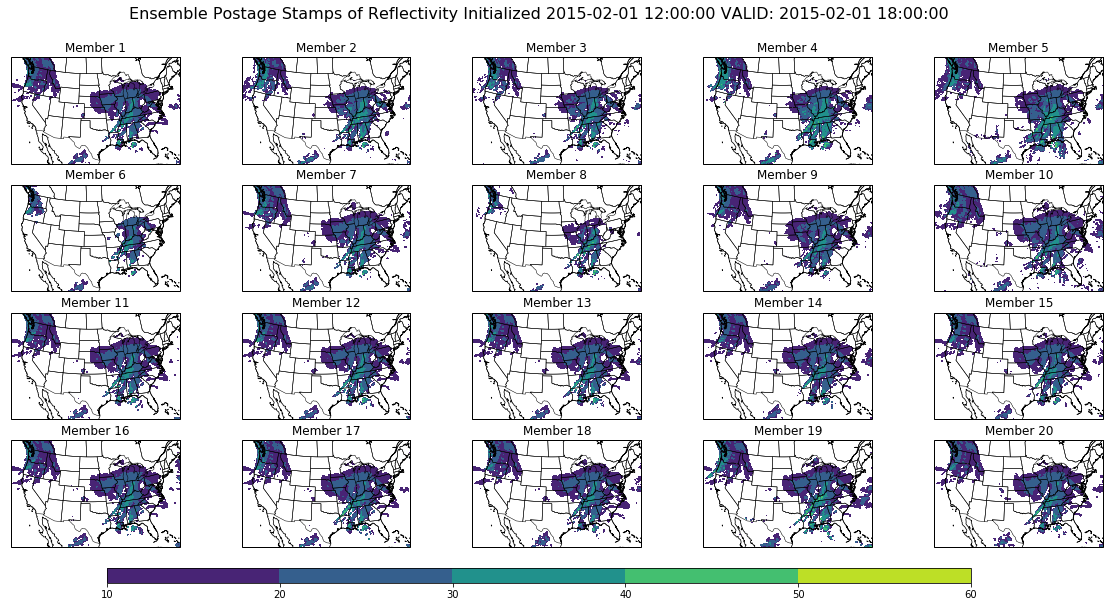

In [13]:
# Choose a time to plot
time = 2
contours = np.arange(10,  70, 10)

fig, axes = plot_panels((20, 10), (4, 5), 20, projection=plotcrs)
cmap = plt.cm.viridis

# Plot the desired contours for each member
for i in range(20):
    # Set up the figure and add a map background
    axes[i].set_extent((-123, -74, 25, 51), ccrs.PlateCarree())
    axes[i].coastlines('50m', edgecolor='black', linewidth=0.75)
    axes[i].add_feature(states_provinces, edgecolor='black', linewidth=0.5)
    cf = axes[i].contourf(lon, lat, refl['mem'+str(i+1)][time,], contours, cmap=cmap, transform=ccrs.PlateCarree())
    axes[i].set_title('Member '+str(i+1))

# Add a colorbar
fig.subplots_adjust(bottom=0.2)
cbax = fig.add_axes([0.2, 0.15, 0.6, 0.02])
cb = fig.colorbar(cf, cax=cbax, orientation='horizontal', shrink=0.1, pad=0.05)

# Make some titles
plt.suptitle('Ensemble Postage Stamps of Reflectivity Initialized %s' %( vtimes[0]) +' VALID: %s' % (vtimes[time]), fontsize=16, y=0.95)
plt.show()

## Ensemble Plumes ##

In this bonus example, we look at a different type of spaghetti plot known as ensemble plumes. Like the spaghetti plot above, we will plot all members on a single graph, but this time it will be for a single point through all forecast hours.

### Choosing a Point ###

First, we will need to choose a location and find the grid point nearest. This will be done with the aid of the following function, courtesy of Kevin Goebbert, Valparaiso University.

In [14]:
def lat_lon_2D_index(y, x, lat1, lon1):
    """
    This function calculates the distance from a desired lat/lon point
    to each element of a 2D array of lat/lon values, typically from model output,
    and determines the index value corresponding to the nearest lat/lon grid point.
    x = longitude array
    y = latitude array
    lon1 = longitude point (signle value)
    lat1 = latitude point (single value)
    Returns the index value for nearest lat/lon point on grid
    Equations for variable distiance between longitudes from
    http://andrew.hedges.name/experiments/haversine/
    """
    R = 6373.*1000.  # Earth's Radius in meters
    rad = np.pi/180.
    x1 = np.ones(x.shape)*lon1
    y1 = np.ones(y.shape)*lat1
    dlon = np.abs(x-x1)
    dlat = np.abs(y-y1)
    a = (np.sin(rad*dlat/2.))**2 + np.cos(rad*y1) * np.cos(rad*y) * (np.sin(rad*dlon/2.))**2
    c = 2 * np.arctan2( np.sqrt(a), np.sqrt(1-a))
    d = R * c
    return np.unravel_index(d.argmin(), d.shape)

Now lets find the index values for the grid point closest to Lansing, MI (42.78 N, -84.59 E) and subset the original data.

In [15]:
idx = lat_lon_2D_index(lat, lon, 42.78, -84.59)

With the index of the grid point nearest to Lansing, MI determined, we will now load the precipitation data and subset to the specified grid point.

In [29]:
pcp = {}
for i in range(1, 21):
    data = Dataset('../2015020112/wrfprst_d01_2015020112_mem'+str(i)+'.nc')
    pcp['mem'+str(i)] = data.variables['tot_pcp'][:-8, idx[0], idx[1]].data

Before plotting, let's calculate the ensemble mean precipitation

In [30]:
mean_pcp = np.mean([pcp[key] for key in pcp.keys()], axis=0)

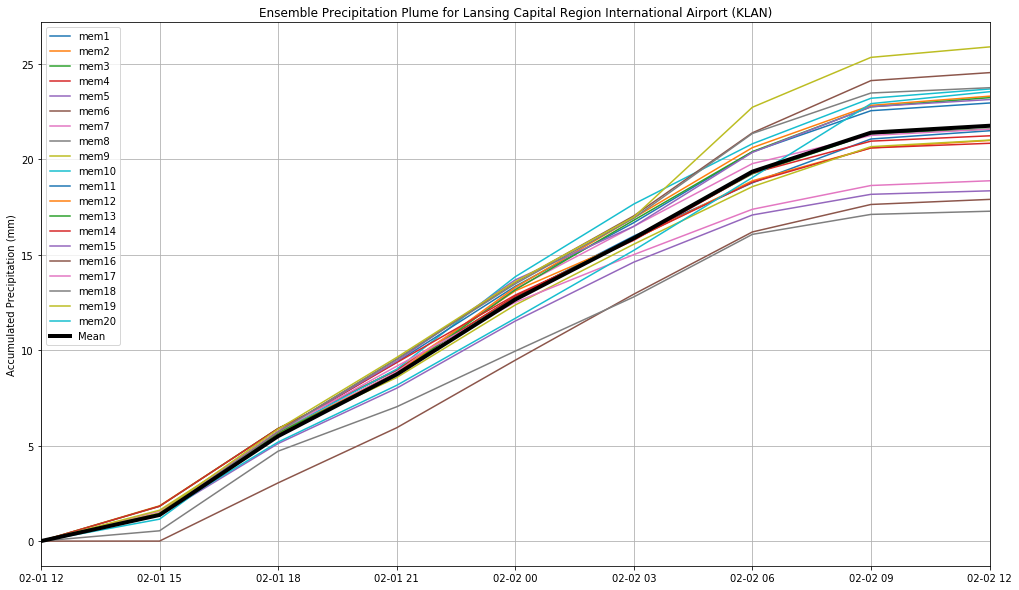

In [32]:
fig = plt.figure(1, figsize=(17., 10.))
for i in range(1, 21):
    plt.plot(vtimes[:-8], pcp['mem'+str(i)], label='mem'+str(i))
plt.plot(vtimes[:-8], mean_pcp, label='Mean', color='k', linewidth=4)
plt.xlim(datetime(2015, 2, 1, 12), datetime(2015, 2, 2, 12))
plt.ylabel('Accumulated Precipitation (mm)')
plt.title('Ensemble Precipitation Plume for Lansing Capital Region International Airport (KLAN)')
plt.grid()
plt.legend()
plt.show()